In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning)

## Load data

In [ ]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
# y_test = np.load("y_test.npy")

In [ ]:
# 7000 data with 300 features
print(x_train.shape)

(7000, 300)


In [ ]:
# It's a binary classification problem 
print(np.unique(y_train))

[0 1]


## Question 1
K-fold data partition: Implement the K-fold cross-validation function. Your function should take K as an argument and return a list of lists (len(list) should equal to K), which contains K elements. Each element is a list contains two parts, the first part contains the index of all training folds, e.g. Fold 2 to Fold 5 in split 1. The second part contains the index of validation fold, e.g. Fold 1 in  split 1

In [ ]:
def cross_validation(x_train, y_train, k=5):
    all_index = []
    # print(x_train.shape[0])
    for i in range(x_train.shape[0]):
      all_index.append(i)
    np.random.shuffle(all_index) 
    kfold = []
    part_a = x_train.shape[0] % k 
    # print(all_index)
    val_index = []
    train_index = []
    start = 0
    for i in range(k):
      val_index = []
      train_index = []
      if i+1 <= part_a:
        val_index = all_index[start : start + (x_train.shape[0] // k + 1)]
        start += (x_train.shape[0] // k + 1)
      else:
        val_index = all_index[start : start + (x_train.shape[0] // k)]
        start += (x_train.shape[0] // k)
      for j in range(len(all_index)):
        if not (all_index[j] in val_index):
          train_index.append(all_index[j])
      kfold.append([np.array(train_index) , np.array(val_index)])
    return np.array(kfold)

In [ ]:
kfold_data = cross_validation(x_train, y_train, k=10)
assert len(kfold_data) == 10 # should contain 10 fold of data
assert len(kfold_data[0]) == 2 # each element should contain train fold and validation fold
assert kfold_data[0][1].shape[0] == 700 # The number of data in each validation fold should equal to training data divieded by K

## example

In [ ]:
from sklearn.model_selection import KFold

X = np.arange(20)
kf = KFold(n_splits=5, shuffle=True)
kfold_data= []
for i, (train_index, val_index) in enumerate(kf.split(X)):
    print("Split: %s, Training index: %s, Validation index: %s" % (i+1, train_index, val_index))
    kfold_data.append([train_index, val_index])

Split: 1, Training index: [ 0  2  3  4  5  6  8  9 10 11 14 15 16 17 18 19], Validation index: [ 1  7 12 13]
Split: 2, Training index: [ 0  1  2  3  4  5  6  7  9 10 12 13 14 15 17 19], Validation index: [ 8 11 16 18]
Split: 3, Training index: [ 0  1  3  5  6  7  8  9 10 11 12 13 14 16 18 19], Validation index: [ 2  4 15 17]
Split: 4, Training index: [ 1  2  3  4  6  7  8  9 10 11 12 13 15 16 17 18], Validation index: [ 0  5 14 19]
Split: 5, Training index: [ 0  1  2  4  5  7  8 11 12 13 14 15 16 17 18 19], Validation index: [ 3  6  9 10]


In [ ]:
assert len(kfold_data) == 5 # should contain 5 fold of data
assert len(kfold_data[0]) == 2 # each element should contains index of training fold and validation fold
assert kfold_data[0][1].shape[0] == 4 # The number of data in each validation fold should equal to training data divieded by K

## Question 2
Using sklearn.svm.SVC to train a classifier on the provided train set and conduct the grid search of “C” and “gamma” to find the best parameters by cross-validation.

In [ ]:
clf = SVC(C=1.0, kernel='rbf', gamma=0.01)

In [ ]:
## your code
C_start_power = 7

C_end_power = 11

C_num = 5                                 


gamma_start_power = -3

gamma_end_power = -7

gamma_num = 5                            

In [ ]:
C_candidate = np.geomspace( pow(10 , C_start_power) , pow(10 , C_end_power) , C_num)
gamma_candidate = np.geomspace( pow(10 , gamma_start_power) , pow(10 , gamma_end_power) , gamma_num)
# print(C_candidate)
# print(gamma_candidate)

[1.e+07 1.e+08 1.e+09 1.e+10 1.e+11]
[1.e-03 1.e-04 1.e-05 1.e-06 1.e-07]


In [ ]:
best_C_para = None
best_gamma_para = None
best_avg_acc = -1

accs = []

for i in C_candidate:
  for j in gamma_candidate:
    # print(f'trying combination : {i} , {j}')
    clf = SVC(C = i , kernel='rbf', gamma = j)
    kfolds = cross_validation(x_train, y_train, k=5)
    acc = []
    for a_fold in kfolds:

      train_index = a_fold[0]
      val_index = a_fold[1]

      train_data = []
      train_labels = []
      val_data = []
      val_labels = []
      for id in train_index:
        train_data.append(x_train[id])
        train_labels.append(y_train[id])
      for id_ in val_index:
        val_data.append(x_train[id_])
        val_labels.append(y_train[id_])
      
      clf.fit(np.array(train_data) , np.array(train_labels))
      pred = clf.predict(np.array(val_data))
      acc.append(accuracy_score(val_labels , pred))
    if np.mean(np.array(acc)) >= best_avg_acc:
      best_C_para = i
      best_gamma_para = j
      best_avg_acc = np.mean(np.array(acc))
    accs.append(np.mean(np.array(acc)))
mmin = min(accs)
mmax = max(accs)

trying combination : 10000000.0 , 0.001
trying combination : 10000000.0 , 0.0001
trying combination : 10000000.0 , 1e-05
trying combination : 10000000.0 , 1e-06
trying combination : 10000000.0 , 1e-07
trying combination : 100000000.0 , 0.001
trying combination : 100000000.0 , 0.0001
trying combination : 100000000.0 , 1e-05
trying combination : 100000000.0 , 1e-06
trying combination : 100000000.0 , 1e-07
trying combination : 1000000000.0 , 0.001
trying combination : 1000000000.0 , 0.0001
trying combination : 1000000000.0 , 1e-05
trying combination : 1000000000.0 , 1e-06
trying combination : 1000000000.0 , 1e-07
trying combination : 10000000000.0 , 0.001
trying combination : 10000000000.0 , 0.0001
trying combination : 10000000000.0 , 1e-05
trying combination : 10000000000.0 , 1e-06
trying combination : 10000000000.0 , 1e-07
trying combination : 100000000000.0 , 0.001
trying combination : 100000000000.0 , 0.0001
trying combination : 100000000000.0 , 1e-05
trying combination : 100000000000

In [ ]:
print(f"best_parameters : parameter for C is {best_C_para} , parameter for Gamma is {best_gamma_para} , with best average accuracy : {best_avg_acc}")

best_parameters : parameter for C is 10000000.0 , parameter for Gamma is 0.0001 , with best average accuracy : 0.9935714285714285


## Question 3
Plot the grid search results of your SVM. The x, y represents the hyperparameters of “gamma” and “C”, respectively. And the color represents the average score of validation folds
You reults should be look like this reference image below ![image](https://miro.medium.com/max/1296/1*wGWTup9r4cVytB5MOnsjdQ.png) 

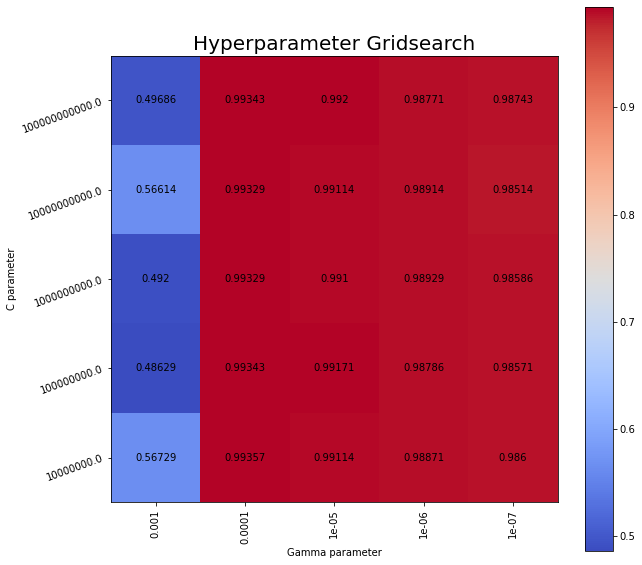

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as matplotlib
from matplotlib.pyplot import figure
# print(accs)
figure(figsize=(10 , 10))
plt.title("Hyperparameter Gridsearch" , fontsize = 20)
accs = np.array(accs)
accs = np.resize(accs, (len(C_candidate) , len(gamma_candidate)))
# print(accs)
plt.imshow(accs , cmap='coolwarm' , origin='lower', vmin=mmin, vmax=mmax)
plt.colorbar()

x_index = list(range(0,len(gamma_candidate))) 
y_index = list(range(0,len(C_candidate))) 
plt.xticks(x_index , gamma_candidate , rotation = 90) 
plt.yticks(y_index , C_candidate , rotation = 20)
plt.xlabel("Gamma parameter") # y label
plt.ylabel("C parameter") # x label
for i in y_index:
  for j in x_index:
      text = plt.text(j, i, np.around(accs[i , j] , 5) , ha="center" , va="center" , color="black" , fontsize=10)
plt.show()

## Question 4
Train your SVM model by the best parameters you found from question 2 on the whole training set and evaluate the performance on the test set.

In [ ]:
best_model = SVC( C = best_C_para , kernel='rbf' , gamma = best_gamma_para )
best_model.fit(x_train , y_train)
y_pred = best_model.predict(x_test)
print("Accuracy score: ", accuracy_score(y_pred, y_test))

NameError: ignored